<a href="https://colab.research.google.com/github/Abhishek-xavi/DataScienceProjects/blob/main/Text%20Preprocessing%20Methods%20for%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connecting to Kaggle Dataset
!pip install kaggle
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#Downloading the datset from Kaggle
!kaggle competitions download -c quora-insincere-questions-classification



 32% 5.00M/15.8M [00:00<00:00, 24.9MB/s]
100% 15.8M/15.8M [00:00<00:00, 52.3MB/s]
 89% 49.0M/54.9M [00:00<00:00, 63.2MB/s]
100% 54.9M/54.9M [00:00<00:00, 102MB/s] 
100% 4.09M/4.09M [00:00<00:00, 29.1MB/s]

100% 5.95G/5.96G [02:43<00:00, 48.0MB/s]
100% 5.96G/5.96G [02:43<00:00, 39.1MB/s]


In [3]:
#Unzipping the Dataset
!unzip embeddings.zip
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  embeddings.zip
   creating: GoogleNews-vectors-negative300/
   creating: glove.840B.300d/
   creating: paragram_300_sl999/
   creating: wiki-news-300d-1M/
  inflating: glove.840B.300d/glove.840B.300d.txt  
  inflating: GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin  
  inflating: wiki-news-300d-1M/wiki-news-300d-1M.vec  
  inflating: paragram_300_sl999/README.txt  
  inflating: paragram_300_sl999/paragram_300_sl999.txt  
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [4]:
#Libraries to be imported
import pandas as pd             #DataFrame
import re                         #Regex library
from collections import Counter   #Module to help count iterable objects. Its a sub class dict datatype
import gensim                     #topic modelling, document indexing and similarity retrieval with large corpora.
import heapq                      #A datastructure which is maintained in ascending order. Whatever you insert, the ascending order is maintained.
from operator import itemgetter
from multiprocessing import Pool

In [5]:
#Importing test dataset
test = pd.read_csv('/content/test.csv')
test.head(5)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
#Importing train dataset
train = pd.read_csv('/content/train.csv')
train.head(5)
#Insincere questions are labelled as 1.

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


## TEXT PREPROCESSING

In [7]:
#Cleaning Special Characters and Removing Punctuations:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', ' ', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return 

In [8]:
#Cleaning numbers
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [9]:
#Removing Misspells:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin', binary=True)
words = model.index2word

In [8]:
w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

#Finds all words
def words(text): return re.findall(r'\w+', text.lower())


def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

#All the vocab words are passed here
#More details on max function with key args.
#Here the vocab is passed with keywords i.e the words of our vocabulary. first we find a list of all possible 
#words from our 4 methods which could relate to our word. Then we check the probablity of each word by the function P and returm the max value.
def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

#Let word be 'computer'. FUnction returns a list of matching words.
def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

#If the word is there in the embeddings.
def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

#word = 'BANANA'
#Returns all possible words with one edit of the actual word being passed.
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    
    #The splits contains tuple of different word combination.
    #LEN(WORD) = 6. i's range is 0 to 7. tuple = [(word[:0], word[0:]),(word[:1], word[1:])...(word[:6], word[6:]) 
    # split = [(, BANANA ),(B, ANANA),(BA, NANA),(BAN, ANA),(BANA, NA),(BANAN, A),(BANANA,)]
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    
    #In SPlits, for every combination where R exists(SInce that covers all our word combos; see list above) we delete
    #the first letter from R and join the word. Basically if we have added any letter in the word by mistake.
    deletes    = [L + R[1:]               for L, R in splits if R]

    #Combination where any two consecutive letters are exchanged. This is saved in transposes.
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]

    #To check if any letter was incorrectly entered. We generate 26 such possibilities.
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]

    #To check if any letter was missing
    inserts    = [L + c + R               for L, R in splits for c in letters]
    
    #Returns a list of possible combinations of the word.
    return set(deletes + transposes + replaces + inserts)

#To check within the list of possible words, if there are more possible words. Nested loop.
#If 1 word had 5 possible words. then each of those 5 will have 5 more.
def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

#Building a vocabulary of words in the sentence.
def build_vocab(texts):
    #SPlitting the question into sentences list.
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

#Passsing the question to build vocab function.
vocab = build_vocab(train.question_text)
#vocab is a dictionary of all the question text with a count of each word.

#Creating a dictionary top_90k_words. We use the function nlargest from heapq library, where from the iterable object dict top 'n'/9000 rows are selected.
#The key determines by which column it is sorted. Here it is by the word count column.
top_90k_words = dict(heapq.nlargest(90000, vocab.items(), key=itemgetter(1)))

#We bring in multiple processing to improve effeciency.
pool = Pool(4)
#The correction method is called with all the top 90000 words being passed.
corrected_words = pool.map(correction,list(top_90k_words.keys()))

#the two lists top_90k_words,corrected_words are bound by a 1 on 1 relation. every element in top_90k_words is 
#paired with an element in corrected_words
for word,corrected_word in zip(top_90k_words,corrected_words):
    if word!=corrected_word:
        print(word,":",corrected_word)

Streaming output truncated to the last 5000 lines.
INFPs? : NFPs
mammoth? : mammoth
soggy? : soggy
20L : 2L
plato? : plato
willing? : willing
dichlorine : dichloride
"Spirit : Spirit
guys) : guys
"did : did
choosing, : choosing
afford, : afford
Preferably, : Preferably
cheaper. : cheaper
Design, : Design
Presidents, : Presidents
desperate, : desperate
Naruto. : Naruto
keloid? : keloids
actor) : actor
Slim's : Slims
M-16 : -1
finished, : finished
instance) : instance
risky, : risky
Kapoor, : Kapoor
“Happy : Happy
news)? : news
Strike? : Strike
concept) : concept
Captain? : Captain
All" : All
United's : Uniteds
ketamine? : ketamine
IT/CS : ITCS
Rock" : Rock
Napoleon, : Napoleon
Olympus? : Olympus
Advanced) : Advanced
sari? : sari
"working : working
Israelis, : Israelis
NRIs? : NRIs
demise, : demise
fiancé? : fiancé
Giants? : Giants
colored? : colored
(criminal : criminal
y1 : 1
full-time, : fulltime
extrovert, : extrovert
80’s : 8s
city)? : city
constitutions? : constitutions
CCMT? : CCM

In [10]:
mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

Single Leading Underscore(_var): Naming convention indicating a name is meant for internal use. Generally not enforced by the Python interpreter (except in wildcard imports) and meant as a hint to the programmer only.
Single Trailing Underscore(var_): Used by convention to avoid naming conflicts with Python keywords.
Double Leading Underscore(__var): Triggers name mangling when used in a class context. Enforced by the Python interpreter.
Double Leading and Trailing Underscore(__var__): Indicates special methods defined by the Python language. Avoid this naming scheme for your own attributes.
Single Underscore(_): Sometimes used as a name for temporary or insignificant variables (“don’t care”). Also: The result of the last expression in a Python

In [23]:
#Making a string of all correct words in the mis spelled dictionary
def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

#mispellings holds the dictionary of correct and incorrect word. #Misspelling_re contains the reg ex patter of all mis spellings.
mispellings, mispellings_re = _get_mispell(mispell_dict)

#Passing the sentence to be corrected
def replace_typical_misspell(text):
    #Replace function takes the incorrect word and matches with the keys and returns the key value. 
    #Here the key is incorrect word and value is the correct word.
    def replace(match):
       return mispellings[match.group(0)]
    #Here we are replacing all the incorrect word, which is passed in the misspelling_re pattern list with the word
    #coming back from replace function. This replacement is happening in the 'text' variable.
    #Whatever word exists in the mispelling_re and matches with text is passed to replace function.
    return mispellings_re.sub(replace, text)

# Usage
replace_typical_misspell("Whta is demonitisation")


'What is demonetization'

In [24]:
#We now work on removing contractions.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [25]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'

## Representation: Sequence Creation

One of the things that has made Deep Learning the "go to" choice for NLP is the fact that we don’t really have to hand-engineer features from the text data. The deep learning algorithms take as input a sequence of text to learn the structure of text just like a human does. Since machines cannot understand words they expect their data in numerical form. So we would like to represent out text data as a series of numbers. 



# a) Tokenizer:
In simple words, a tokenizer is a utility function to split a sentence into words. keras.preprocessing.text.Tokenizer tokenizes(splits) the texts into tokens(words) while keeping only the most occurring words in the text corpus.

In [29]:
from keras.preprocessing.text import Tokenizer
train_X = train.question_text
test_X = test.question_text
## Tokenize the sentences
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(list(train_X)+list(test_X))
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)

The num_words parameter keeps a pre-specified number of words in the text only. This is helpful as we don’t want our models to get a lot of noise by considering words that occur very infrequently. In real-world data, most of the words we leave using num_words param are normally misspells. The tokenizer also filters some non-wanted tokens by default and converts the text into lowercase.

The tokenizer once fitted to the data also keeps an index of words (dictionary of words which we can use to assign a unique number to a word) which can be accessed by:

 tokenizer.word_index
The words in the indexed dictionary are ranked in order of frequencies.


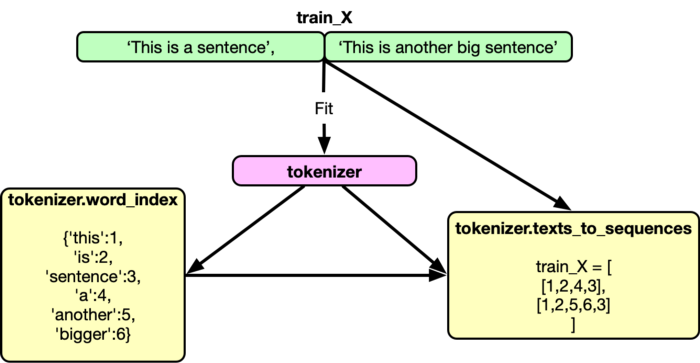

b) Pad Sequence:
Normally our model expects that each sequence (each training example) will be of the same length (same number of words/tokens). We can control this using the maxlen parameter.

For example:

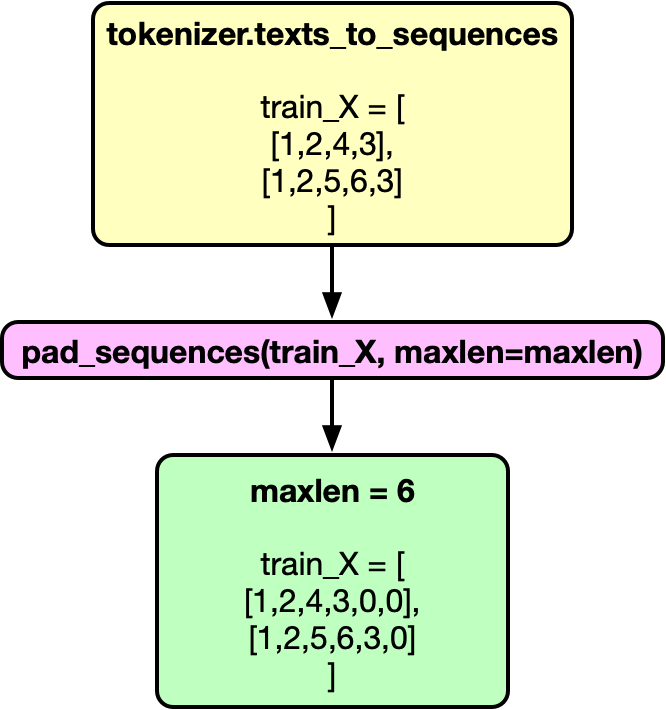

In [38]:
# length list in a nested list
  
def FindMaxLength(lst):
    maxList = max(lst, key = lambda i: len(i))
    maxLength = len(maxList)
    return maxLength

# Finding max length
maxlen_train = FindMaxLength(train_X)
maxlen_test = FindMaxLength(test_X)

In [39]:
from keras.preprocessing.sequence import pad_sequences
train_X = pad_sequences(train_X, maxlen=maxlen_train)
test_X = pad_sequences(test_X, maxlen=maxlen_test)

Now our train data contains a list of numbers. Each list has the same length. And we also have the word_index which is a dictionary of the words occurring most in the text corpus.

## Embedding Enrichment

As mentioned above, we will be using GLoVE Word2Vec embeddings to explain the enrichment. GLoVE pretrained vectors are trained on the Wikipedia corpus. (You can download them here). 

That means some of the words that might be present in your data might not be present in the embeddings. How could we deal with that? Let’s first load the Glove Embeddings first.

In [42]:
import numpy as np
def load_glove_index():
    EMBEDDING_FILE = '/content/glove.840B.300d/glove.840B.300d.txt'
    
    def get_coefs(word,*arr): 
      return word, np.asarray(arr, dtype='float32')[:300]
    
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    return embeddings_index

glove_embedding_index = load_glove_index()

What does this glove_embedding_index contain? It is just a dictionary in which the key is the word and the value is the word vector, a np.array of length 300. The length of this dictionary is somewhere around a billion. Since we only want the embeddings of words that are in our word_index, we will create a matrix which just contains required embeddings.

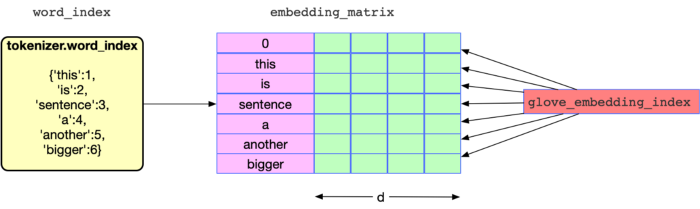

The above exploration and pre-processing is to get an idea on text pre-processing.
The methods were understood and implemented from
https://www.exxactcorp.com/blog/Deep-Learning/text-preprocessing-methods-for-deep-learning